# Pymaceuticals Inc.
---

# Analysis

# This analysis screens for potential treatments for squamous cell carcinoma (SCC), a commonly occurring form of skin cancer.
# The analysis uses 249 mice identified with SCC tumors which received treatment from range of drug regimens. 
# The treatment is over the course of 45 days, on which tumor development was observed and measured. 
# The purpose of this study was to compare the performance of Pymaceuticals’ drug of interest, Capomulin, against the other treatment regimens.
# From the analysis , We used bar charts to visualize the data and shows that Capomulin was used to test more than 200 mice compared to other regimens
# Line scatter plots were used to visua;ize the change in size of the tumour against the timepoint over the course of treatment. This outcome shows that the Capomulin treament was very effective. 
# Scatter plots were also used to show the positive correlation between the tumoursize against the timepoint
# Various visualization methods were used to help different audience in understanding outcome of the analysis and the data presented. 


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame

combined_data = pd.merge(study_results ,mouse_metadata, on="Mouse ID", how = "left")

# Display the data table for preview

combined_data


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [42]:
# Checking the number of mice.

number_of_mice = len(combined_data['Mouse ID'].unique())

number_of_mice


249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint

# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

duplicate_mice_ids = combined_data[combined_data.duplicated(subset = ["Mouse ID", "Timepoint"])]["Mouse ID"].unique()
duplicate_mice_ids


array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mice_dataset = combined_data[combined_data["Mouse ID"] == 'g989']

duplicate_mice_dataset

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

cleaned_data = combined_data[combined_data["Mouse ID"].isin(duplicate_mice_ids) == False]

cleaned_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [6]:
# Checking the number of mice in the clean DataFrame.
new_num_mice = len(cleaned_data["Mouse ID"].unique())

new_num_mice

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

means = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
medians = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variances = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
standard_deviations = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sems = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.

summary_stats = pd.DataFrame({
    "Mean Tumor Volume (mm3)": means,
    "Median Tumor Volume (mm3)": medians,
    "Tumor Volume Variances": variances,
    "Tumor Volume Standard Deviations": standard_deviations,
    "Tumor Volume Standard Errors": sems
})
summary_stats

,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Tumor Volume Variances,Tumor Volume Standard Deviations,Tumor Volume Standard Errors
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)



# Using the aggregation method, produce the same summary statistics in a single line
stats_total = cleaned_data.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})
stats_total

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

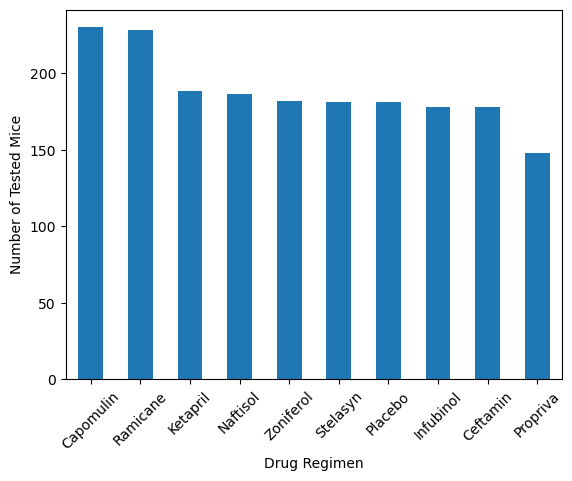

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

mice_tests = cleaned_data["Drug Regimen"].value_counts()
mice_tests.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.xticks(rotation=45)
plt.ylabel("Number of Tested Mice")
plt.show()

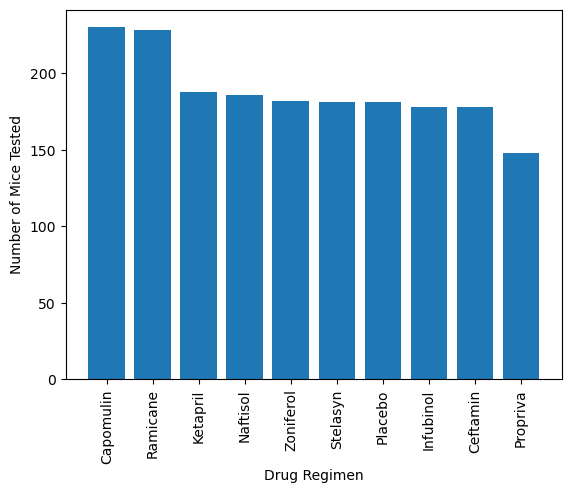

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

tests = cleaned_data["Drug Regimen"].value_counts()
plt.bar(tests.index.values, tests.values)
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("Number of Mice Tested")
plt.show()

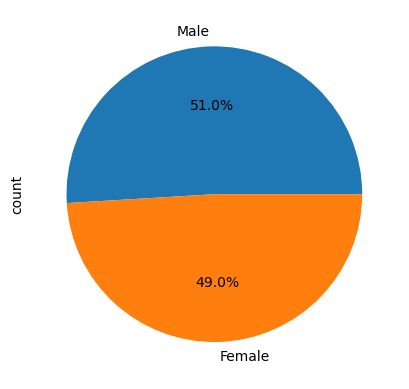

In [13]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

gender_counts = cleaned_data["Sex"].value_counts()

# Get the unique mice with their gender
gender_counts.plot(kind="pie", autopct="%1.1f%%")

# Make the pie chart
plt.ylabel("count")  
plt.show()

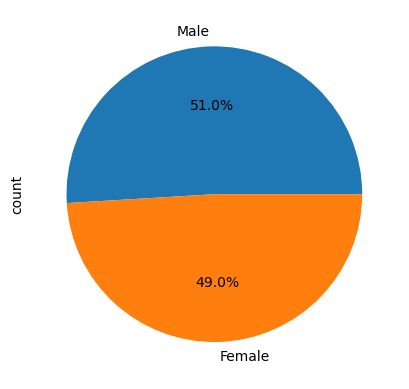

In [14]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
gender_comparison = cleaned_data.Sex.value_counts()


# Get the unique mice with their gender
plt.pie(gender_comparison.values, labels=gender_comparison.index.values, autopct="%1.1f%%")

# Make the pie chart
plt.ylabel("count")
plt.show()

## Quartiles, Outliers and Boxplots

In [21]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_tumor=cleaned_data.groupby(["Mouse ID"])["Timepoint"].max()
last_tumor=last_tumor.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

tumor_merged=last_tumor.merge(cleaned_data, on=["Mouse ID", "Timepoint"],how="left")

tumor_merged

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [16]:
# Put treatments into a list for for loop (and later for plot labels)

treatment_type = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


# Create empty list to fill with tumor vol data (for plotting)

tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for drug in treatment_type:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
        last_tumor_vol = tumor_merged.loc[tumor_merged["Drug Regimen"]==drug,"Tumor Volume (mm3)"]

    # add subset
        tumor_vol_list.append(last_tumor_vol)

    # Determine outliers using upper and lower bounds
        quartiles = last_tumor_vol.quantile([.25,.5,.75])
        firstq = quartiles[0.25]
        thirdq = quartiles[0.75]
        iqr = thirdq - firstq
        lower_bound = firstq - (1.5 * iqr)
        upper_bound = thirdq + (1.5 * iqr)
    
        outliers = last_tumor_vol.loc[(last_tumor_vol < lower_bound) | (last_tumor_vol > upper_bound)]
        print(f"{drug}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


/var/folders/mw/ftwvgm1x0p34897xs8r0hg4h0000gn/T/ipykernel_1470/2038006106.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(tumor_vol_list, labels = treatment_type, flierprops=orange_out)


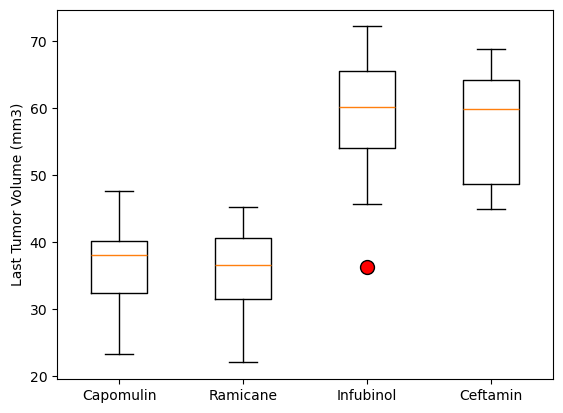

In [17]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.

orange_out = dict(markerfacecolor='red', markersize=10)
plt.boxplot(tumor_vol_list, labels = treatment_type, flierprops=orange_out)
plt.ylabel("Last Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

Text(0.5, 1.0, 'Capomulin Treatment of Mouse l509')

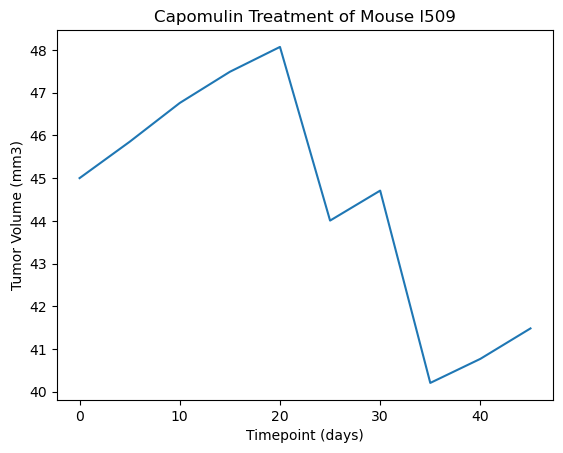

In [18]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

capomulin_stats = cleaned_data[cleaned_data["Drug Regimen"] == "Capomulin"]
mouse_data = capomulin_stats[capomulin_stats["Mouse ID"] == "l509"]
plt.plot(mouse_data["Timepoint"], mouse_data["Tumor Volume (mm3)"])
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse l509")


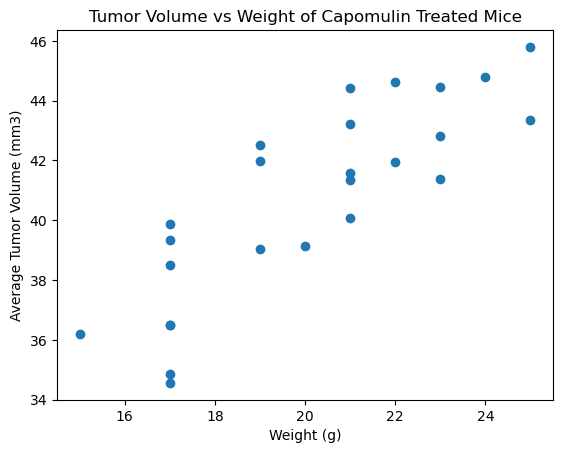

In [19]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

capomulin_stats = cleaned_data[cleaned_data["Drug Regimen"] == "Capomulin"]
capomulin_average = capomulin_average = capomulin_stats.groupby("Mouse ID").mean(numeric_only=True)
plt.scatter(capomulin_average["Weight (g)"], capomulin_average["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Tumor Volume vs Weight of Capomulin Treated Mice")
plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


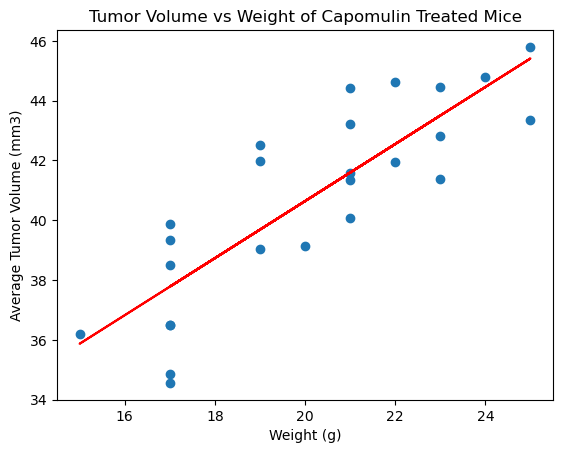

In [20]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

corre = st.pearsonr(capomulin_average["Weight (g)"], capomulin_average["Tumor Volume (mm3)"])
print(f"The correlation between mouse weight and the average tumor volume is {round(corre[0],2)}")

model = st.linregress(capomulin_average["Weight (g)"], capomulin_average["Tumor Volume (mm3)"])
slope = model [0]
y_intercept = model [1]
y_values = capomulin_average["Weight (g)"] * slope + y_intercept
plt.scatter(capomulin_average["Weight (g)"], capomulin_average["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Tumor Volume vs Weight of Capomulin Treated Mice")
plt.plot(capomulin_average["Weight (g)"], y_values, color="red")